<IPython.core.display.Javascript object>


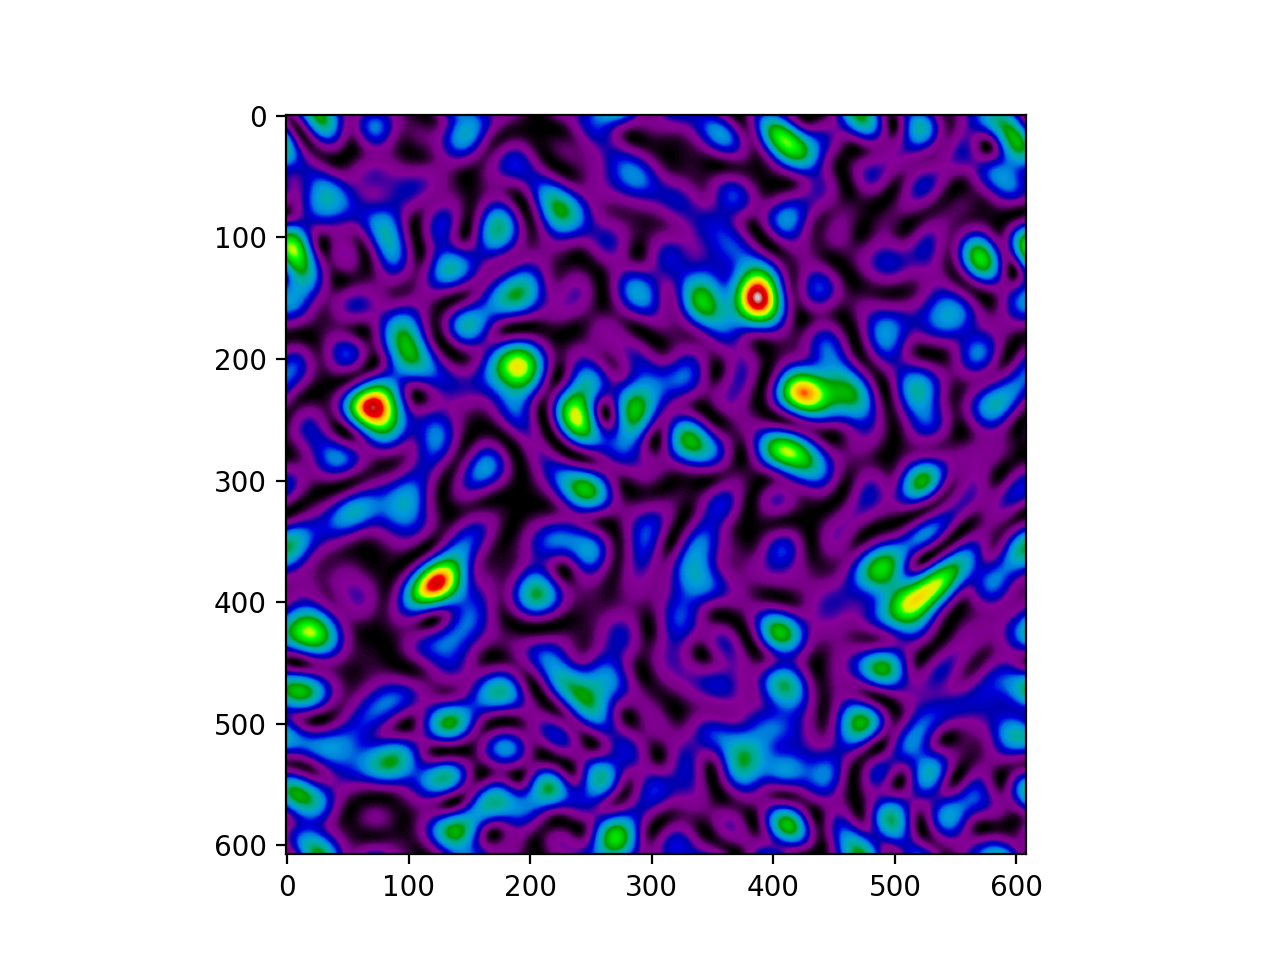

<IPython.core.display.Javascript object>


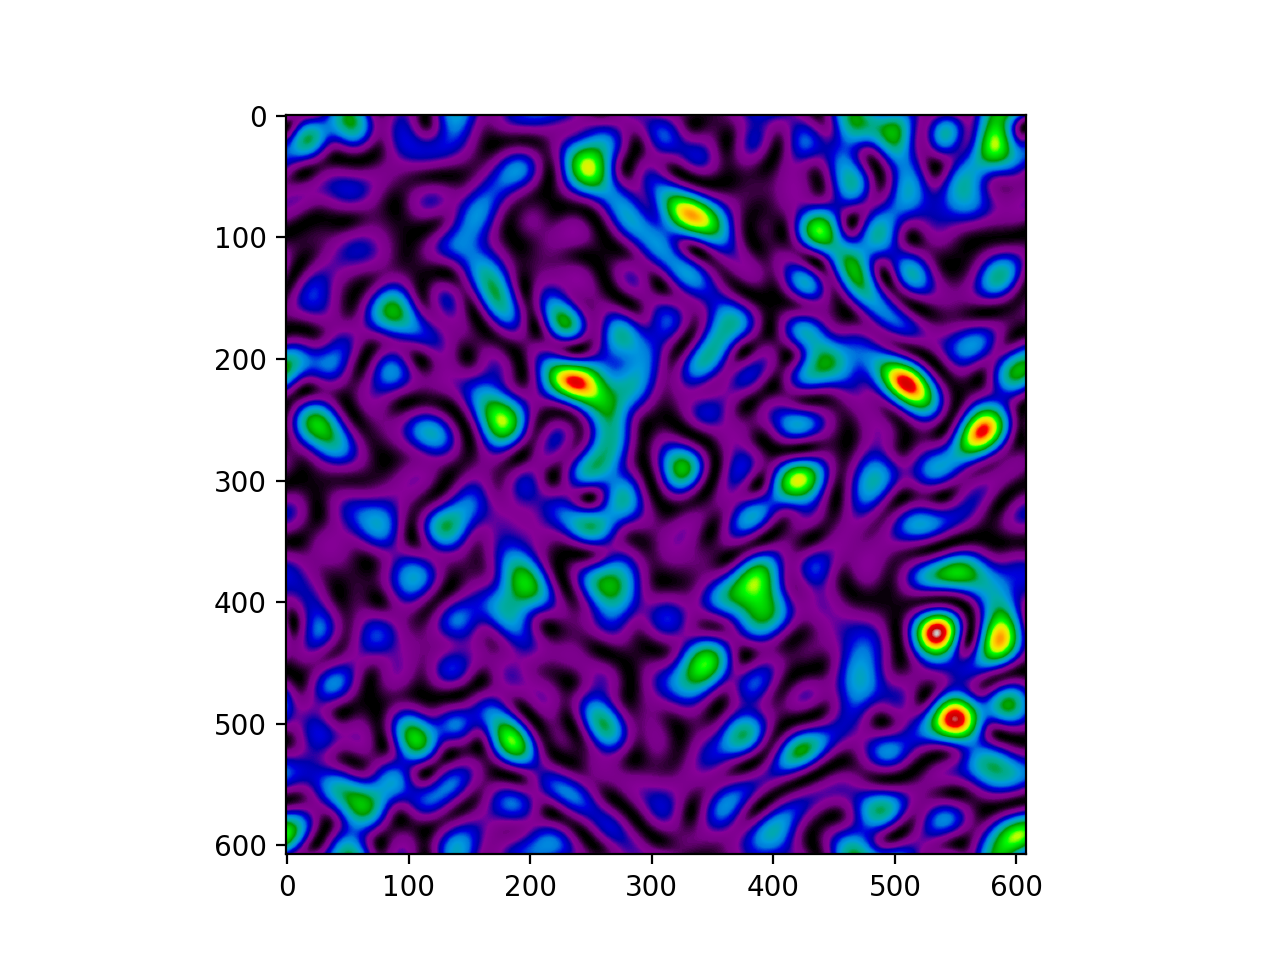

In [9]:
import sys
sys.path.append('../src/')
from xpcs import *
from sims import *

import scipy.fftpack as sfft
%run simulation.ipynb
%matplotlib notebook

$$
g_2(\mathbf{Q},t) = \frac{\langle I(\mathbf{Q},t)I(\mathbf{Q},t+\tau)\rangle_{\tau}}{\langle I(\mathbf{Q},\tau)\rangle^2_{\tau}}
$$

In [33]:
def g2(imgs):
    """""""""
    variables:
    imgs [number of frames x height x width] = numpy array ROI of detector image
    
    
    returns:
    G2 [1 x number of frames] correlation = numpy array autocorrelation function defined above
    """""""""
    
    G2 = np.zeros((1,imgs.shape[0]))
    
    for t in range(imgs.shape[0]):
        for tt in range(imgs.shape[0]-1): 
            G2[0,t] += np.mean(imgs[t,:,:]*imgs[t+tt,:,:],axis=(0,1))
            
        G2[0,t] = G2[0,t]/imgs.shape[0]/np.mean(imgs)**2
        
    return G2

In [34]:
speckle_movie.shape

(501, 608, 608)

In [35]:
G2 = g2(speckle_movie)

IndexError: index 501 is out of bounds for axis 0 with size 501